In [4]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **1.File reading**

In [5]:
import pandas as pd
dataPath = "/content/drive/My Drive/Colab Notebooks/Final/data/LINUX/CAMONLY"
dataName = "/CAMONLY1.csv"

In [6]:
cap = pd.read_csv(dataPath+dataName)
cap.head(5)

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.42.0.22,47.93.129.21,UDP,46,38849 > 32100 Len=4
1,2,0.000726,10.42.0.22,47.52.252.114,UDP,46,38849 > 32100 Len=4
2,3,0.001379,10.42.0.22,47.254.36.28,UDP,46,38849 > 32100 Len=4
3,4,0.002083,10.42.0.22,47.93.129.21,UDP,86,38849 > 32100 Len=44
4,5,0.002758,10.42.0.22,47.52.252.114,UDP,86,38849 > 32100 Len=44


# **2.Summary and Plot**

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
length = cap.groupby("Length").count()
print(length)

         No.  Time  Source  Destination  Protocol  Info
Length                                                 
42      1480  1480    1480         1480      1480  1480
46      1393  1393    1393         1393      1393  1393
50      1132  1132    1132         1132      1132  1132
54        37    37      37           37        37    37
60        22    22      22           22        22    22
62      2248  2248    2248         2248      2248  2248
66      1209  1209    1209         1209      1209  1209
70         7     7       7            7         7     7
74       219   219     219          219       219   219
78       216   216     216          216       216   216
86      1182  1182    1182         1182      1182  1182
90       118   118     118          118       118   118
329       11    11      11           11        11    11
342       11    11      11           11        11    11


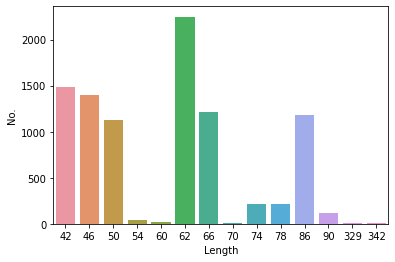

In [36]:
sns.barplot(x=length.index, y="No.", data=length)

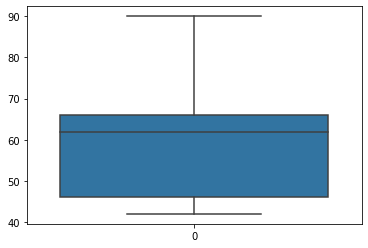

In [116]:
sns.boxplot(data=cap[cap["Length"]<100]["Length"])

In [13]:
def iog(cap):
  time = []
  ind = 0
  cnt = 0
  t = 0
  while ind<len(cap):
    while ind<len(cap) and cap["Time"][ind]<t+1:
      cnt += 1
      ind += 1
    time.append(cnt)
    cnt = 0
    t += 1
  time = pd.Series(time)
  return time

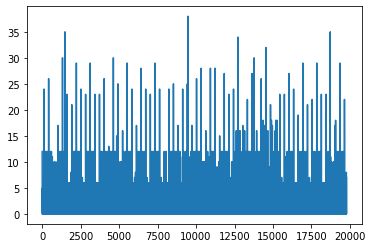

In [6]:
time = iog(cap)
import matplotlib.pyplot as plt
time.plot()

# **3.Period Check**

In [40]:
!pip install dtw

  Created wheel for dtw: filename=dtw-1.4.0-cp36-none-any.whl size=5315 sha256=3e0d52a859416eb955087239b7c5c501bb577ca463bff2c550dd50a7099ee199
  Stored in directory: /root/.cache/pip/wheels/8c/8b/7a/947d67b53cd54948890a173527b0470ef56998812fc9d0a803
Successfully built dtw


In [106]:
from dtw import dtw
import numpy as np
def prdCheck(s, T=60):
  ss = []
  for i in range(int(len(s)/T)):
    ss.append(list(s[T*i:T*i+T]))
  dists = []
  sumDist = 0
  for i in range(len(ss)-1):
    dist,cost,acc,path = dtw(ss[i], ss[i+1], dist=lambda x,y: abs(x-y))
    dists.append(dist)
    sumDist += dist
  return dists, sumDist

In [ ]:
pScores = []
for i in range(50, 70):
  dists, sumDist = prdCheck(time, i)
  pScores.append(sumDist)

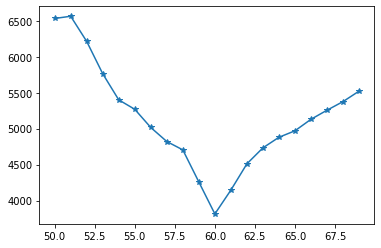

In [113]:
plt.plot(range(50, 70), pScores, "*-")

# **4.Correlation between arp and udp**

In [23]:
arps = cap[cap["Protocol"] == "ARP"].reset_index(drop=True)
udps = cap[cap["Protocol"] == "UDP"].reset_index(drop=True)

In [24]:
arptime = iog(arps)
udptime = iog(udps)

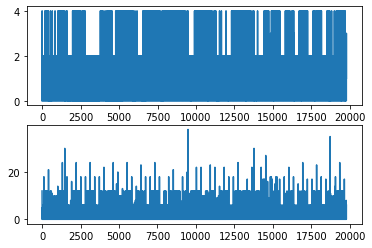

In [25]:
import matplotlib.pyplot as plt
plt.subplot(211)
plt.plot(arptime)
plt.subplot(212)
plt.plot(udptime)